# Data Exploration

In [1]:
from get_data import *
import matplotlib.pyplot as plt

In [4]:
all_df = get_one_file(stock_code='2330', year_month='202201')
gb = all_df.groupby('date')

2022-10-11 03:39:02.626 | INFO     | get_data.py         :   51 | /Users/anthonywah/Desktop/MAFM/MAFS6100-2/order_placement_data/2330/2330_md_202201_202201.csv.gz - Got 1170817 entries - 12.30s


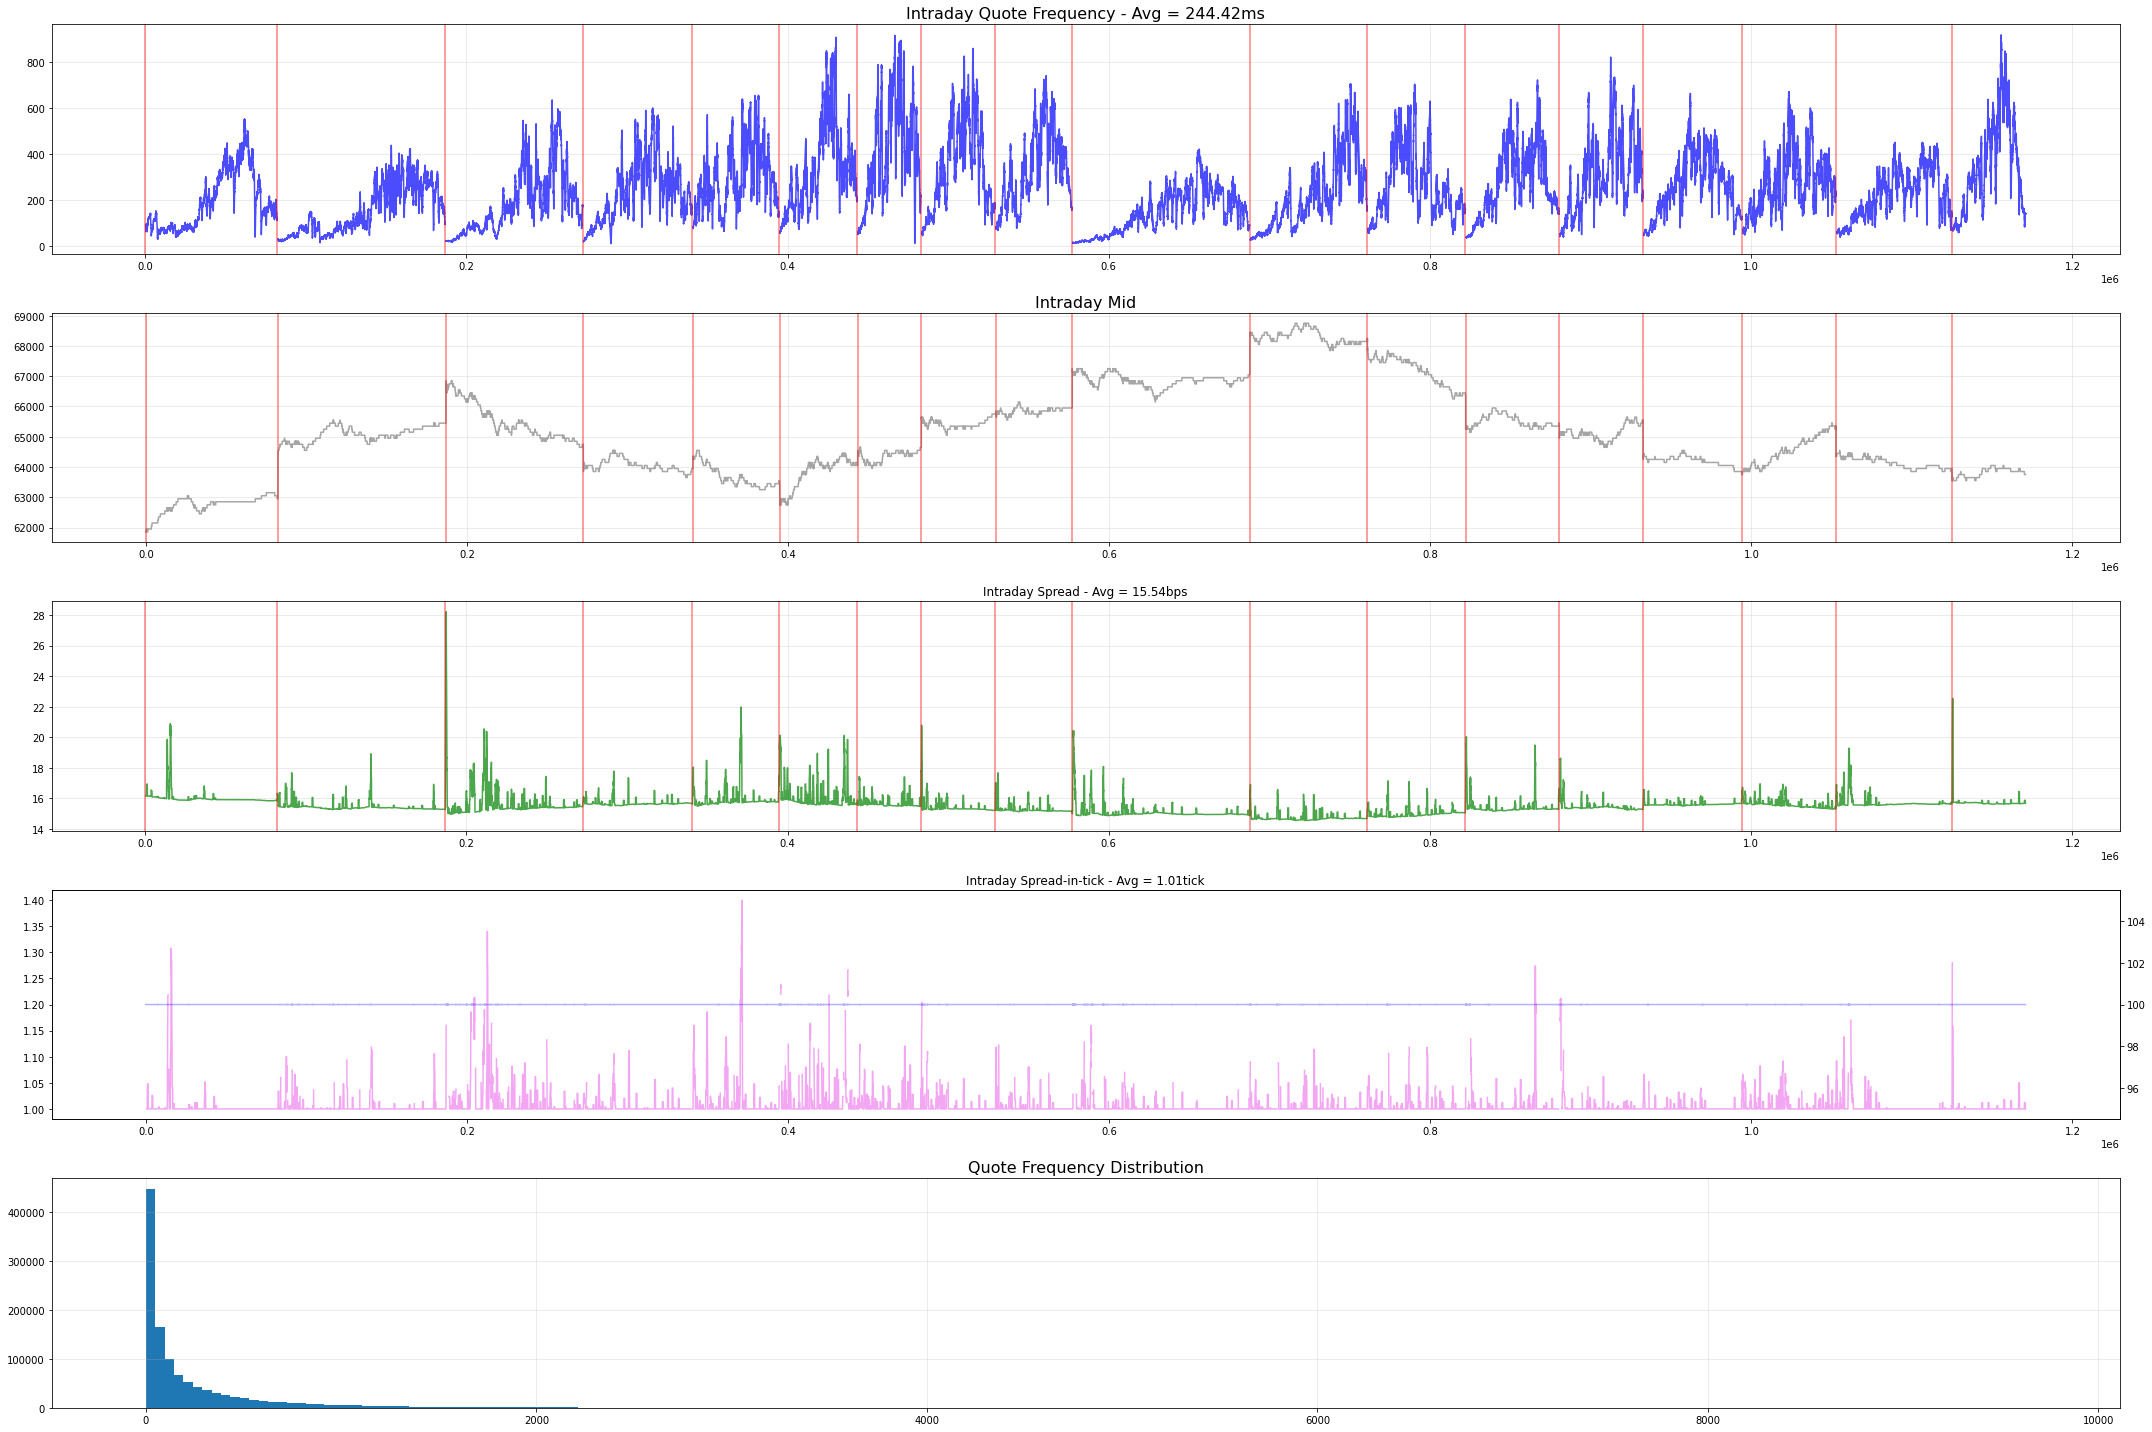

In [5]:
# Quote frequency plot
start_date = '2022-01-01'
end_date = '2022-01-31'

df = all_df.loc[(all_df['date'] >= start_date) & (all_df['date'] <= end_date), :].reset_index(drop=True)
fig, axs = plt.subplots(figsize=(30, 20), nrows=5)
ax_freq, ax_mid, ax_spr, ax_spr_t, ax_hist = axs

# Freq series plot
avg_freq = df['intv'].mean()
ax_freq.set_title(f'Intraday Quote Frequency - Avg = {avg_freq:.2f}ms', fontsize=16)
ax_freq.plot(df['intv'].rolling(500).mean(), color='blue', alpha=0.7)
ax_freq.grid(True, alpha=0.3)

# Mid price
ax_mid.set_title(f'Intraday Mid', fontsize=16)
ax_mid.plot(df['mid'], color='grey', alpha=0.7) 
ax_mid.grid(True, alpha=0.3)

# Spread bps plot
df.loc[:, 'spread_bps'] = 10000 * df['spread'] / df['mid']
ax_spr.set_title(f'Intraday Spread - Avg = {df["spread_bps"].mean():.2f}bps')
ax_spr.plot(df['spread_bps'].rolling(500).mean(), color='green', alpha=0.7)
ax_spr.grid(True, alpha=0.3)

# Spread in tick plot
ax_spr_t.set_title(f'Intraday Spread-in-tick - Avg = {df["spread_in_tick"].mean():.2f}tick')
ax_spr_t.plot(df['spread_in_tick'].rolling(500).mean(), color='violet', alpha=0.7)
ax_spr_t2 = ax_spr_t.twinx()
ax_spr_t2.plot(df['tick_size'], color='blue', alpha=0.3)
ax_spr.grid(True, alpha=0.3)

# Add V line indicating days
for i, row in df.loc[df['intv'].isna(), :].iterrows():
    ax_freq.axvline(i, color='red', alpha=0.5)
    ax_mid.axvline(i, color='red', alpha=0.5)
    ax_spr.axvline(i, color='red', alpha=0.5)

# Distribution
ax_hist.set_title('Quote Frequency Distribution', fontsize=16)
ax_hist.hist(df['intv'], bins=200)
ax_hist.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()